In [6]:
import pandas as pd
import os
from dotenv import load_dotenv
import pymongo

In [2]:
load_dotenv()

True

In [3]:
dbname='VeichleData'
collection_name = 'VeichleData-Collection'
URI = os.getenv("MONGO_URI")
pwd = os.getenv("MONGO_PASSWORD")

In [4]:
URL=URI.replace("<db_password>",pwd)

In [7]:
client = pymongo.MongoClient(URL)
data_base = client[dbname]
collection = data_base[collection_name]

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings("ignore")

# Import Datasets

In [94]:
cursor = collection.find({})

In [95]:
data = list(cursor)

In [96]:
df = pd.DataFrame(data)

In [97]:
df.head()

,_id,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,6834956b7c13c666c906a4b9,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,6834956b7c13c666c906a4ba,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,6834956b7c13c666c906a4bb,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,6834956b7c13c666c906a4bc,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,6834956b7c13c666c906a4bd,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [98]:
df.drop('_id',axis=1,inplace=True)

In [99]:
del data

In [100]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [21]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

### Column Definations
---
- id: Unique ID for the customer
- Gender: Gender of the customer
- Age: Age of the customer
- Driving_License: [0 : Customer does not have DL, 1 : Customer already has DL]
- Region_Code: Unique code for the region of the customer
- Previously_Insured: [1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance]
- Vehicle_Age: Age of the Vehicle
- Vehicle_Damage: [1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.]
- Annual_Premium: The amount customer needs to pay as premium in the year
- Policy_Sales_Channel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over - Phone, In Person, etc.
- Vintage: Number of Days, Customer has been associated with the company
- Response: [1 : Customer is interested, 0 : Customer is not interested]

# EDA

In [20]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Nothing to clean

In [22]:
df.shape

(381104, 12)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381104 entries, 0 to 381103
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381104 non-null  int64  
 1   Gender                381104 non-null  object 
 2   Age                   381104 non-null  int64  
 3   Driving_License       381104 non-null  int64  
 4   Region_Code           381104 non-null  float64
 5   Previously_Insured    381104 non-null  int64  
 6   Vehicle_Age           381104 non-null  object 
 7   Vehicle_Damage        381104 non-null  object 
 8   Annual_Premium        381104 non-null  float64
 9   Policy_Sales_Channel  381104 non-null  float64
 10  Vintage               381104 non-null  int64  
 11  Response              381104 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [25]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381104.000000,381104.000000,381104.000000,381104.000000,381104.000000,381104.000000,381104.000000,381104.000000,381104.000000
mean,190557.500000,38.822524,0.997869,26.388862,0.458211,30564.348708,112.034762,154.347666,0.122560
std,110015.392832,15.511553,0.046110,13.229875,0.498251,17213.254286,54.203736,83.671278,0.327932
min,6.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95281.750000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190557.500000,36.000000,1.000000,28.000000,0.000000,31668.500000,133.000000,154.000000,0.000000
75%,285833.250000,49.000000,1.000000,35.000000,1.000000,39400.250000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [28]:
# checking distribution for target column
dist = dict(df['Response'].value_counts())
dist

{0: 334396, 1: 46708}

In [29]:
dist[1]/(dist[0]+dist[1])

0.12255972123095007

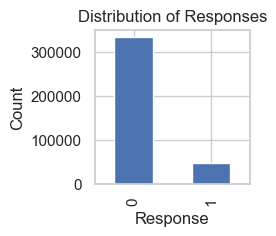

In [30]:
value_counts = df['Response'].value_counts()

plt.figure(figsize=(2, 2))

# Create the bar plot
value_counts.plot(kind='bar')

# Customize the plot (optional)
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Distribution of Responses')

# Show the plot
plt.show()

<Axes: >

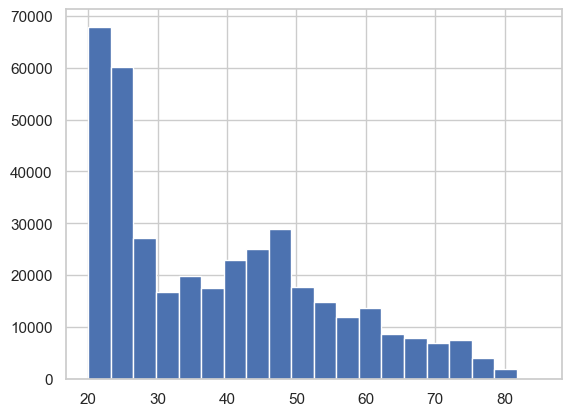

In [31]:
# checking distribution for age col
df['Age'].hist(bins=20)

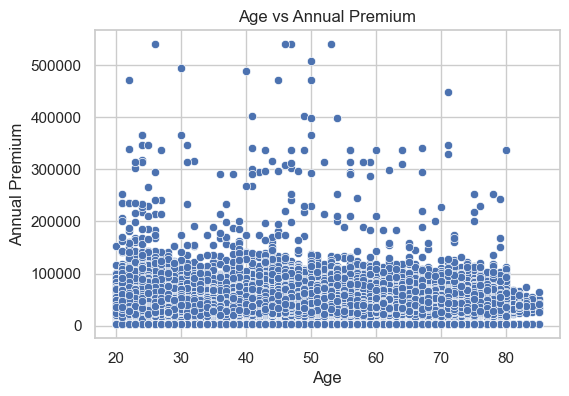

In [32]:
# Scatter Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Age', y='Annual_Premium', data=df)
plt.title('Age vs Annual Premium')
plt.xlabel('Age')
plt.ylabel('Annual Premium')
plt.show()

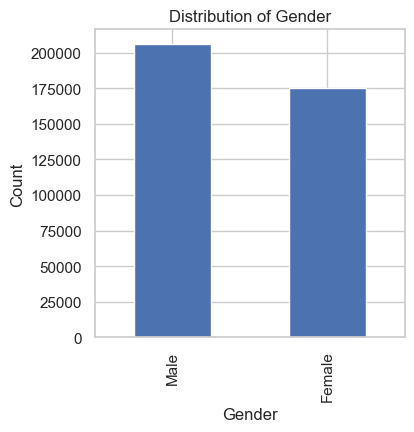

In [33]:
# Gender-Response comparison

value_counts = df['Gender'].value_counts()
plt.figure(figsize=(4, 4))

# Create the bar plot
value_counts.plot(kind='bar')

# Customize the plot (optional)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')

# Show the plot
plt.show()

   Gender  Response   count
0  Female         0  156834
1  Female         1   18185
2    Male         0  177562
3    Male         1   28523


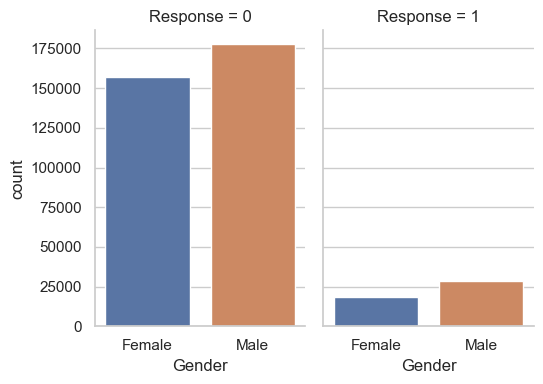

In [61]:
# Gender wise response plot
data = df.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
print(data)

g = sns.catplot(x="Gender", y="count",col="Response", data=data, kind="bar", height=4, aspect=.7);

In [43]:
# Driving lisence by gender
data = df.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
data

,Gender,Driving_License
0,Female,175019
1,Male,206085


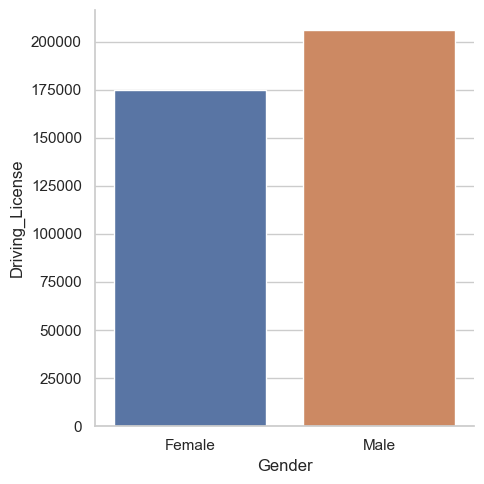

In [45]:
sns.catplot(x='Gender',y='Driving_License',data=data,kind='bar')

Gender
Male      205485
Female    174807
Name: count, dtype: int64


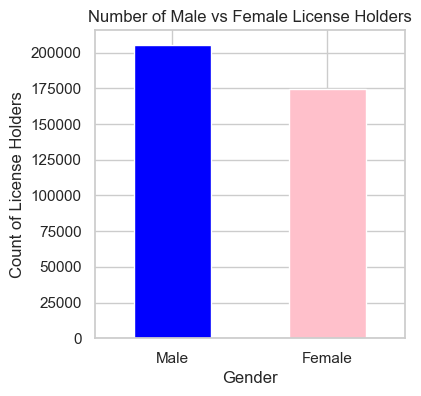

In [54]:
# Number of license holder Male vs Female
data = df[df['Driving_License']==1]['Gender'].value_counts()
print(data)
plt.figure(figsize=(4, 4))
data.plot(kind='bar', color=['blue', 'pink'])
plt.title('Number of Male vs Female License Holders')
plt.xlabel('Gender')
plt.ylabel('Count of License Holders')
plt.xticks(rotation=0)
plt.show()

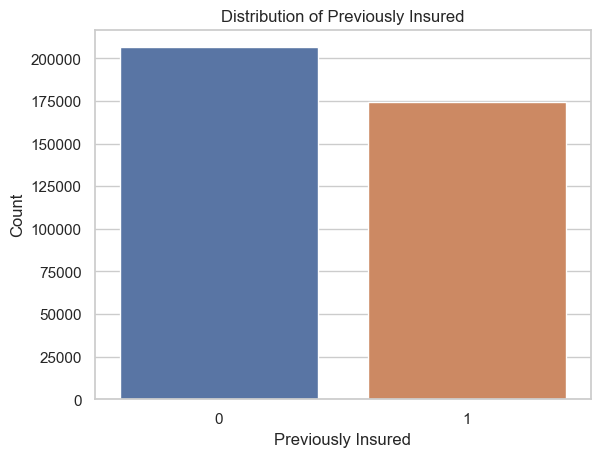

In [55]:
# customers with existing insurance

sns.countplot(x="Previously_Insured", data=df)
plt.title("Distribution of Previously Insured")
plt.xlabel("Previously Insured")
plt.ylabel("Count")
plt.show()

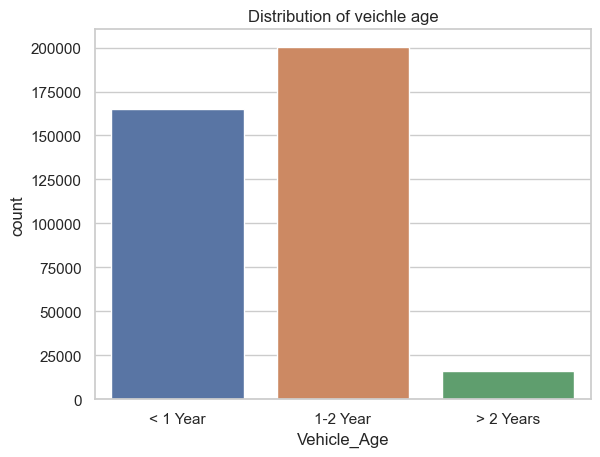

In [59]:
# checking veichle age distribution

sns.countplot(x='Vehicle_Age',data=df)
plt.title('Distribution of veichle age')
plt.show()

  Vehicle_Age  Response   count
0    1-2 Year         0  165509
1    1-2 Year         1   34806
2    < 1 Year         0  157582
3    < 1 Year         1    7202
4   > 2 Years         0   11305
5   > 2 Years         1    4700



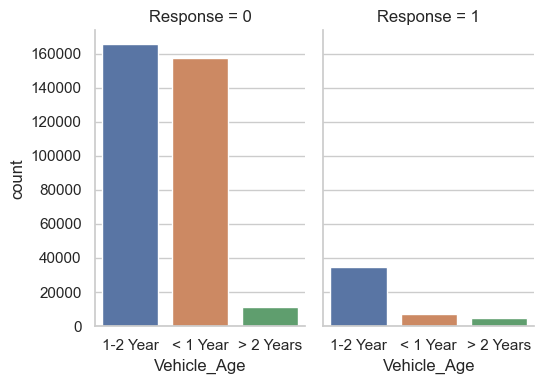

In [72]:
# Response vs Vehicle_Age

data=df.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
print(data,end='\n\n')
sns.catplot(x='Vehicle_Age',y='count',col='Response',data=data,kind='bar',height=4,aspect=.7)

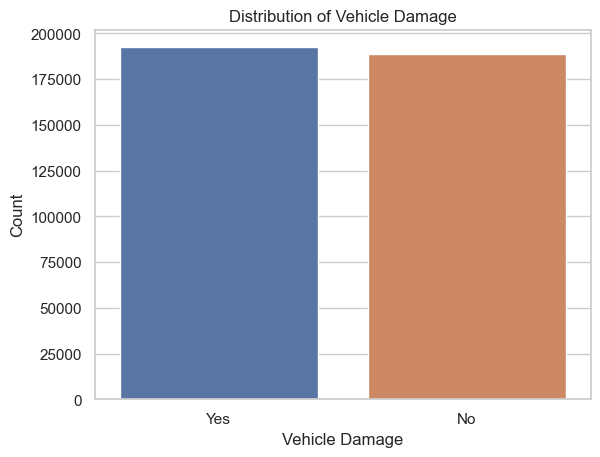

In [73]:
# dist for Vehicle_Damage col

sns.countplot(data=df, x='Vehicle_Damage')
plt.title('Distribution of Vehicle Damage')
plt.xlabel('Vehicle Damage')
plt.ylabel('Count')
plt.show()

  Vehicle_Damage  Response   count
0             No         0  187711
1             No         1     982
2            Yes         0  146685
3            Yes         1   45726


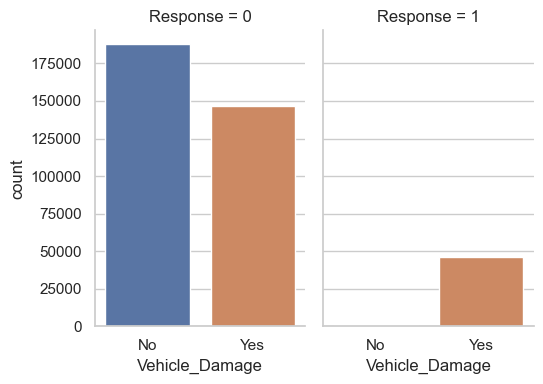

In [80]:
# Distribution of veichle damage with respect to Response

data = df.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
print(data)
sns.catplot(x='Vehicle_Damage',y='count',col='Response',data=data,kind='bar',height=4,aspect=.7)

In [81]:
# checking stats for Annual_Premium
df['Annual_Premium'].describe()

count    381104.000000
mean      30564.348708
std       17213.254286
min        2630.000000
25%       24405.000000
50%       31668.500000
75%       39400.250000
max      540165.000000
Name: Annual_Premium, dtype: float64

<Axes: >

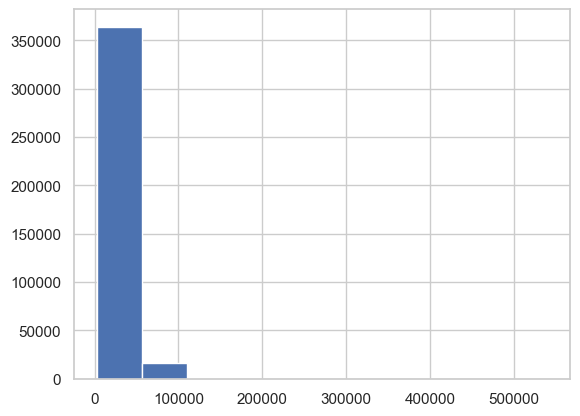

In [82]:
df['Annual_Premium'].hist(bins=10)

In [83]:
df[df['Annual_Premium']>200000]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1407,1413,Female,41,1,28.0,0,1-2 Year,Yes,267698.0,124.0,63,1
11314,11320,Female,50,1,46.0,1,1-2 Year,No,508073.0,26.0,192,0
13421,13427,Female,47,1,28.0,0,1-2 Year,Yes,301762.0,124.0,22,0
15019,15025,Female,32,1,28.0,0,1-2 Year,Yes,315565.0,155.0,150,0
25527,25533,Male,50,1,28.0,0,1-2 Year,Yes,229935.0,122.0,64,1
...,...,...,...,...,...,...,...,...,...,...,...,...
368258,368264,Female,25,1,28.0,1,< 1 Year,Yes,346982.0,124.0,74,0
371905,371911,Female,23,1,37.0,1,< 1 Year,No,235683.0,152.0,246,0
372487,372493,Male,46,1,18.0,0,1-2 Year,No,220581.0,26.0,210,0
373410,373416,Male,56,1,28.0,0,1-2 Year,No,337573.0,26.0,239,0


# Data Preprocessing

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381104 entries, 0 to 381103
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381104 non-null  int64  
 1   Gender                381104 non-null  object 
 2   Age                   381104 non-null  int64  
 3   Driving_License       381104 non-null  int64  
 4   Region_Code           381104 non-null  float64
 5   Previously_Insured    381104 non-null  int64  
 6   Vehicle_Age           381104 non-null  object 
 7   Vehicle_Damage        381104 non-null  object 
 8   Annual_Premium        381104 non-null  float64
 9   Policy_Sales_Channel  381104 non-null  float64
 10  Vintage               381104 non-null  int64  
 11  Response              381104 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [86]:
num_feat = ['Age','Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year',
'Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']

In [101]:
# mapping 'Gender' col to (0, 1) values
df['Gender'] = df['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

In [102]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [103]:
for col in df.columns:
    print(f"{col} >> {df[col].dtype}")

id >> int64
Gender >> int32
Age >> int64
Driving_License >> int64
Region_Code >> float64
Previously_Insured >> int64
Vehicle_Age >> object
Vehicle_Damage >> object
Annual_Premium >> float64
Policy_Sales_Channel >> float64
Vintage >> int64
Response >> int64


In [104]:
# creating dummy cols for categorical features

df=pd.get_dummies(df,drop_first=True)
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,False,True,True
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,False,False,False


In [105]:
for col in df.columns:
    print(f"{col} >> {df[col].dtype}")

id >> int64
Gender >> int32
Age >> int64
Driving_License >> int64
Region_Code >> float64
Previously_Insured >> int64
Annual_Premium >> float64
Policy_Sales_Channel >> float64
Vintage >> int64
Response >> int64
Vehicle_Age_< 1 Year >> bool
Vehicle_Age_> 2 Years >> bool
Vehicle_Damage_Yes >> bool


In [106]:
# cols renaming and keeping dtype as int

df = df.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
df['Vehicle_Age_lt_1_Year'] = df['Vehicle_Age_lt_1_Year'].astype('int')
df['Vehicle_Age_gt_2_Years'] = df['Vehicle_Age_gt_2_Years'].astype('int')
df['Vehicle_Damage_Yes'] = df['Vehicle_Damage_Yes'].astype('int')

for column in cat_feat:
    df[column] = df[column].astype('str')

In [107]:
# scaling the data

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

ss = StandardScaler()
df[num_feat] = ss.fit_transform(df[num_feat])


mm = MinMaxScaler()
df[['Annual_Premium']] = mm.fit_transform(df[['Annual_Premium']])

# also, dropping id col now
id=df.id
df=df.drop('id',axis=1)

In [108]:
# train-test split

from sklearn.model_selection import train_test_split

train_target=df['Response']
train=df.drop(['Response'], axis = 1)
x_train,x_test,y_train,y_test = train_test_split(train,train_target, random_state = 0)

In [109]:
train_target

0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    0
381108    0
Name: Response, Length: 381109, dtype: int64

In [110]:
train.head(1)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,0.333777,1,28.0,0,0.070366,26.0,0.748795,0,1,1


# Model Training

## Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(x_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 10],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [300]},
                   random_state=101, verbose=1)

In [112]:
best_params = model.best_params_

print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'n_estimators': 300, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_depth': 10, 'criterion': 'entropy'}


In [115]:
# save model

import pickle

model_path = "../models"
os.makedirs(model_path,exist_ok=True)

filename = 'rf_model.pkl'
file_path = os.path.join(model_path,filename)
pickle.dump(model, open(file_path, 'wb'))

In [117]:
# loading back pickle file

rf_load = pickle.load(open(file_path, 'rb'))

# Model Evaluation

In [118]:
from sklearn.metrics import classification_report

y_pred=model.predict(x_test)
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83603
           1       0.00      0.00      0.00     11675

    accuracy                           0.88     95278
   macro avg       0.44      0.50      0.47     95278
weighted avg       0.77      0.88      0.82     95278

